Oriya Villarreal

Homework 4

27 October 2022

---

**Continuation of Homework 3**

Problem: Test whether the difference in peak flows between WS1 and WS2 is statistically different for four different time period using HJ Andrews Peakflow Data

A. Plot Streamflow Measurements for WS1 and WS2

In [5]:
# Step 1: Import packages needed for dataset
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Step 2: Filepath and filename for HJ Andrews dataset  
andrews_data_file = 'HJAndrews_peakflow_WS1_WS2_WS3.xlsx'
andrews_data = pd.read_excel(andrews_data_file)


/opt/conda/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


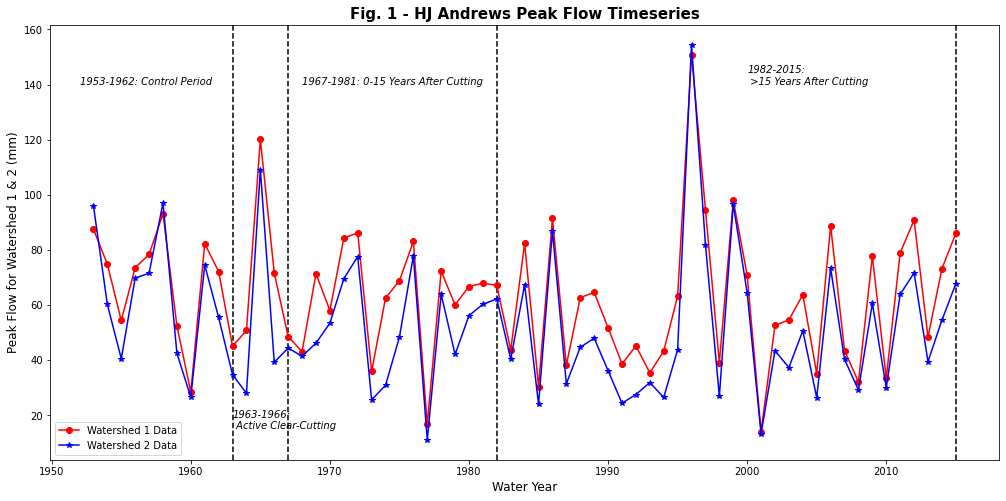

In [43]:
# Step 3: Plots for Part A

# Figure 1 - Timeseries
plt.figure(figsize=(17,8))

# Vertical Lines to Indicate Time Periods
plt.axvline(x = 1963, color = 'black', linestyle='--')
plt.axvline(x = 1967, color = 'black', linestyle='--')
plt.axvline(x = 1982, color = 'black', linestyle='--')
plt.axvline(x = 2015, color = 'black', linestyle='--')

# Text to label Time Periods
plt.text(1952, 140, '1953-1962: Control Period', style='italic')
plt.text(1963, 15, '1963-1966:\n Active Clear-Cutting', style='italic')
plt.text(1968, 140, '1967-1981: 0-15 Years After Cutting', style='italic')
plt.text(2000, 140, '1982-2015:\n >15 Years After Cutting', style='italic')

# Plot HJ Andrews Peak Flow Data for Watershed 1
plt.plot(andrews_data['Water Year'], # x value
         andrews_data['Watershed 1'],# y value
         linestyle='-',
         marker='o',
         color='red', 
        label='Watershed 1 Data') 

# Plot HJ Andrews Peak Flow Data for Watershed 2
plt.plot(andrews_data['Water Year'], # x value
         andrews_data['Watershed 2'],# y value
         linestyle='-',
         marker='*',
         color='blue',
        label='Watershed 2 Data') 
# Labels
plt.xlabel('Water Year', fontsize=12)
plt.ylabel('Peak Flow for Watershed 1 & 2 (mm)', fontsize=12)
plt.title('Fig. 1 - HJ Andrews Peak Flow Timeseries', fontweight='bold', fontsize=15)

# Legend info:
plt.legend(loc='lower left');
plt.show()

# Code for Vertical line taken from https://www.geeksforgeeks.org/plot-a-vertical-line-in-matplotlib/
# Code for Adding text to plot taken from https://www.geeksforgeeks.org/how-to-add-text-to-matplotlib/

**B. Creating Two Datasets to Figure Out Which One is Closest to Normally Distributed**

0     -8.4578
1     14.5788
2     13.8677
3      3.7844
4      6.8069
       ...   
58    15.0868
59    19.1507
60     8.8895
61    18.6427
62    18.3125
Name: Q12, Length: 63, dtype: float64
0    -0.092220
1     0.216796
2     0.294239
3     0.052821
4     0.090880
        ...   
58    0.212103
59    0.236799
60    0.203123
61    0.294185
62    0.239445
Name: Qlog12, Length: 63, dtype: float64


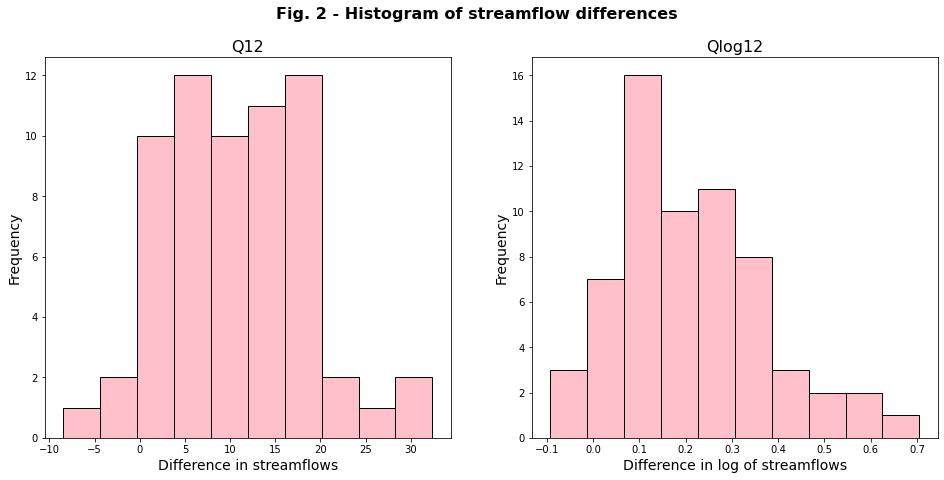

In [8]:
# Step 1: Create New Dataframe to Compare Watershed 1 and Watershed 2
differences_df = pd.DataFrame()

# Data for Q12
differences_df['Q12'] = andrews_data['Watershed 1'] - andrews_data['Watershed 2']
print(differences_df['Q12'])

# Data for Qlog12
differences_df['Qlog12'] = np.log(andrews_data['Watershed 1']) - np.log(andrews_data['Watershed 2'])
print(differences_df['Qlog12'])


# Step 2: Graphs to Show Which is Closer to Normally Distributed (Histograms)
fig, ax = plt.subplots(1,2, figsize=(16,7))

ax[0].hist(differences_df['Q12'], 10, ec="black", facecolor='pink')
ax[0].set_xlabel('Difference in streamflows', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)
ax[0].set_title('Q12',  fontsize=16,)

ax[1].hist(differences_df['Qlog12'], 10, ec="black", facecolor='pink')
ax[1].set_xlabel('Difference in log of streamflows', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_title('Qlog12',  fontsize=16,)
fig.suptitle('Fig. 2 - Histogram of streamflow differences', fontsize=16, fontweight='bold');


# Source code for creating dataframe: https://stackoverflow.com/questions/48350850/subtract-two-columns-in-dataframe and George from class
# Source code for finding Qlog12 data: George from Class 
# Source code for putting graphs next to each other: George

The above histogram on the left represents the difference in streamflows v. frequency for Watershed 1 and Watershed 2 (Q12). The histogram on the right displays the difference in the log of streamflows v. frequency for WS1 and WS2 (Qlog12). Transforming Q12 by taking the log of the data brings it closer to normal distribution. Performing a transformation to approach normal distribution is necessary for Analysis of Variance (ANOVA) testing. ANOVA is a tool that splits a variable inside a dataset into two parts (systemic factors and random factors). When data is close to normal distribution, the data is more organized and can easily detect linear relationships between variables, making performing an ANOVA analysis more effective.

**C: Stating the Null and Alternative Hypothesis:** Are the Four Periods Statistically Different from Each Other?

Null: All four periods have the same central mean

Alternative: The means for the four periods are all different from each other

Want: 95% Confidence, so *a* = 0.05

**D: Perform a ANOVA Test to determine whether the Null Hypothesis is true or not.**

In [47]:
# Step 1: Generate an F and P-value

# Split Data into 4 Periods
period1 = differences_df[andrews_data['Index12']==1]['Qlog12']
period2 = differences_df[andrews_data['Index12']==2]['Qlog12']
period3 = differences_df[andrews_data['Index12']==3]['Qlog12']
period4 = differences_df[andrews_data['Index12']==4]['Qlog12']

fvalue, pvalue = stats.f_oneway(period1, period2, period3, period4)

# print the results
print("F-statistic = {}".format( np.round(fvalue,2)))
print("p = {}".format( pvalue ))

# Source code for splitting data into periods: Danny in Slack

F-statistic = 3.09
p = 0.033664673930299725


The p-value above is smaller than the chosen a, 0.05. Additionally, the F-Statistic implies there is significant differences between Watershed 1 and 2. If there were no differences, the F-statistic would be closer to 1. Based on the p-value and f-statistic, we can most likely reject the null hypothesis. This data only compares the two watersheds. In order to compare more details between the four periods, we can creat an ANOVA table below:

In [54]:
#Step 2: Create an ANOVA Table
import statsmodels.api as sm
import pandas as pd
from statsmodels.formula.api import ols

differences_df_reshaped = pd.DataFrame()
differences_df_reshaped['index']=differences_df.index
differences_df_reshaped['variable']=andrews_data['Index12']
differences_df_reshaped['value']=differences_df['Qlog12']

# replace column names
differences_df_reshaped.columns = ['index', 'treatments', 'value']

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=differences_df_reshaped).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# display the results table
anova_table

# Code assistance: Stack Overflow, Maryam, and Lab 3-2

,sum_sq,df,F,PR(>F)
C(treatments),0.226959,3.0,3.094333,0.033665
Residual,1.442482,59.0,NaN,NaN


In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [55]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=differences_df_reshaped['value'], groups=differences_df_reshaped['treatments'], alpha=0.05)

# display the results table
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.2724 0.0233  0.0278  0.517   True
     1      3   0.1233 0.2263 -0.0455 0.2921  False
     1      4   0.1019 0.2786 -0.0468 0.2506  False
     2      3  -0.1491  0.336 -0.3817 0.0835  False
     2      4  -0.1705 0.1773  -0.389  0.048  False
     3      4  -0.0214    0.9 -0.1496 0.1067  False
---------------------------------------------------


The above table indicates that one watershed has been impacted significantly more than the other due o clear cutting. The data supports the alternative hypothesis.

---
**Problem 2: Linear and Quantile Regression**

In [58]:
# Step 1: Identify Dalles Flow Dataset 
df_dalles = pd.read_csv('dalles_flow.csv')
data.head(3)

,Year,Peak Daily (cfs),Annual Mean (cfs)
0,1858,563000,NaN
1,1859,847000,NaN
2,1860,668000,NaN


In [59]:
# Filter Data and Isolate 1879-1973
dalles_1879_1973 = df_dalles[(df_dalles['Year'] >= 1879) & (df_dalles['Year'] <= 1933)]
x = dalles_1879_1973['Peak Daily (cfs)']
y = dalles_1879_1973['Annual Mean (cfs)']

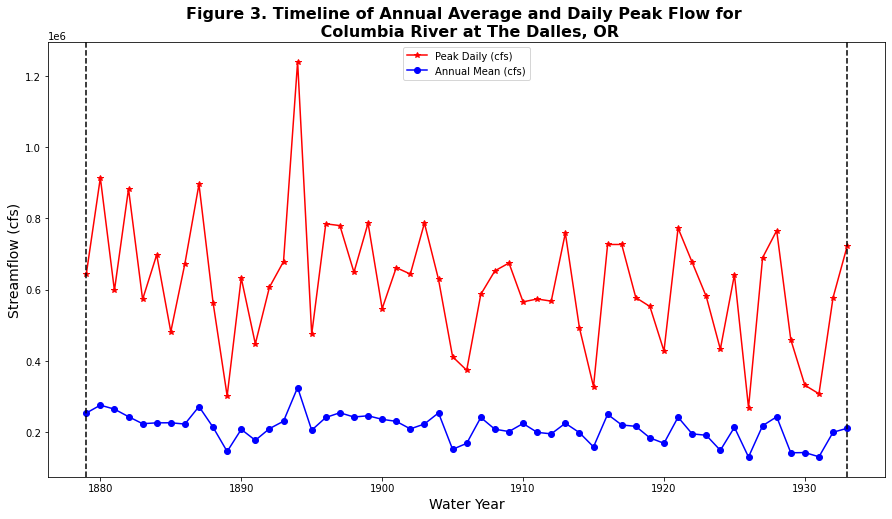

In [65]:
# Step 2: Create a Timeseries Graph

fig, ax = plt.subplots(figsize=(15,8))

#Plot the Data based on Periods against plotting position
ax.plot(dalles_1879_1973['Year'], x, 'r-*', label="Peak Daily (cfs)")
ax.plot(dalles_1879_1973['Year'], y, 'b-o', label="Annual Mean (cfs)")

# Vertical Lines to Indicate Time Periods
plt.axvline(x = 1879, color = 'black', linestyle='--')
plt.axvline(x = 1933, color = 'black', linestyle='--')

# Labels
ax.set_title('Figure 3. Timeline of Annual Average and Daily Peak Flow for \n Columbia River at The Dalles, OR', fontsize=16, fontweight='bold')
ax.set_xlabel('Water Year', fontsize=14)
ax.set_ylabel('Streamflow (cfs)', fontsize=14);

# Legend
plt.legend(loc="best");
plt.show()

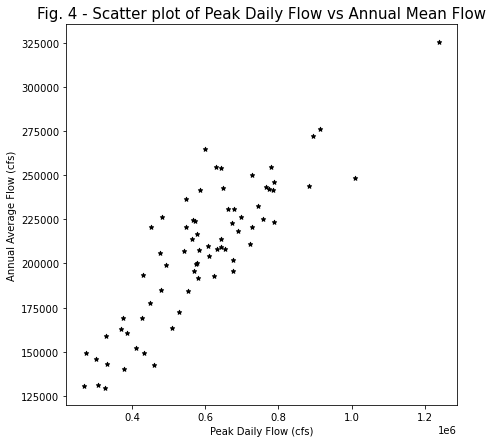

In [79]:
# Create Scatterplot of Data in Timeseries
fig, ax = plt.subplots(figsize=(7,7))

# Scatterplot
data.plot.scatter(x='Peak Daily (cfs)', y='Annual Mean (cfs)', c='k', ax=ax, marker='*');

# Labels
ax.set_xlabel('Peak Daily Flow (cfs)')
ax.set_ylabel('Annual Average Flow (cfs)');
ax.set_title('Fig. 4 - Scatter plot of Peak Daily Flow vs Annual Mean Flow', fontsize=15,);


In [80]:
# Calculate Linear Regression
# use the linear regression function from scipy library

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
# Compute the SST for x
sst_x = np.sum( (x - np.mean(x))**2 )
# Compute the standard error
s = stderr * np.sqrt(sst_x)
print('B0: {}'.format(np.round(intercept,4)))
print('B1: {}'.format(np.round(slope,4)))
print('R^2: {}'.format(np.round(rvalue**2,3)))
print('R: {}'.format(np.round(rvalue,3)))
print('Standard error of B1: {}'.format(np.round(stderr,3)))
print('s: {}'.format(np.round(s,3)))

B0: 92295.1358
B1: 0.1958
R^2: 0.753
R: 0.868
Standard error of B1: 0.015
s: 19830.907


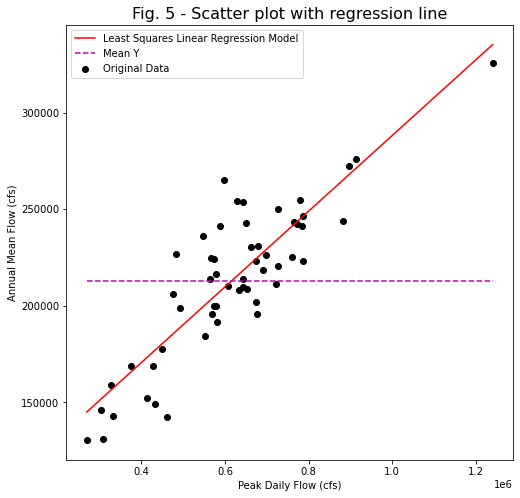

In [87]:
# Create Scatterplot with Linear Regression

fig, ax = plt.subplots(figsize=(8,8))

# Scatterplot
ax.scatter(x=x, y=y, c='k', label="Original Data")
ax.set_xlabel('Peak Daily Flow (cfs)')
ax.set_ylabel('Annual Mean Flow (cfs)')
ax.set_title('Fig. 5 - Scatter plot with regression line', fontsize=16,)
# x_linspace = np.linspace(x.min(), x.max(), len(x)) # make a linear space of x coordinates from min and max values of SLI_max
# y_hat = slope * x_linspace + intercept # y coordinates using the slope and intercept from our linear regression to draw a regression line
# # Create points for the regression line
# x = np.linspace(data.SLI_max.min(), data.SLI_max.max(), 2) # make two x coordinates from min and max values of SLI_max
# y = slope * x + intercept # y coordinates using the slope and intercept from our linear regression to draw a regression line
# Plot the regression line
ax.plot([x.min(), x.max()], [intercept + slope*x.min(), intercept + slope*x.max()], '-r', label="Least Squares Linear Regression Model");
# Plot the mean line, we only need two points to define a line, use xmin and xmax
ax.plot([x.min(), x.max()], [y.mean(), y.mean()] , '--m', label='Mean Y')
ax.legend();
# ax.set_xlabel('Slide Canyon max SWE (mm)')
# ax.set_ylabel('Blue Canyon max SWE (mm)');

# Source code: Collaboration with George

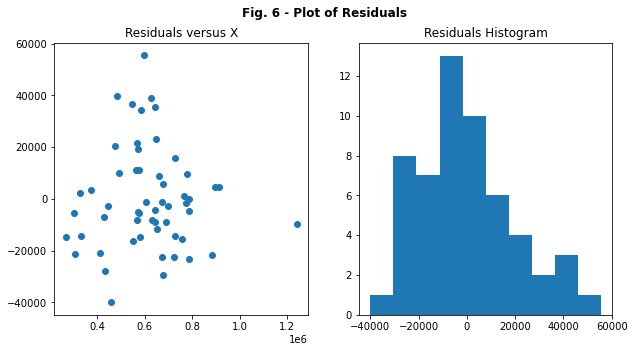

In [89]:
# Plot Residuals
y_hat = slope * x + intercept
residuals = (y - y_hat)
fig, [ax2, ax3] = plt.subplots(nrows=1, ncols=2, figsize=(10,5),)

# Plot the residuals
ax2.scatter(x,residuals,)
ax2.set_title('Residuals versus X');

# Plot a histogram of the residuals
ax3.hist(residuals, bins=10)
ax3.set_title('Residuals Histogram');

fig.suptitle('Fig. 6 - Plot of Residuals', fontweight='bold', fontsize=12);

**B.** Analysis: The resulting model shows that the residuals are normally distributed and there is no show of a trend over time. 

**C.** Confidence Intervals

We need to choose/predict values for y for this step. In order to do that, the x values must give us some predicted value for y in the equation below:

$\hat{y}^* = \hat{B}_0 + \hat{B}_1x^*$

In [91]:
# Step 1: Establish array of predicted x values
p_x = np.linspace(x.min(),x.max(),100)

# Create an array of predicted y values based on the equation above
p_y = intercept + slope*p_x

In [92]:
# Step 2: Compute Error of Prediction for p_x

n = len(x)
sigma_ep = np.sqrt( s**2 * (1+ 1/n + ( ( n*(p_x-x.mean())**2 ) / ( n*np.sum(x**2) - np.sum(x)**2 ) ) ) )



In [93]:
# Step 3: Choose an alpha value, then calculate lower and upper limits of our predictions
alpha = 0.05

n = len(p_x)
dof = n - 2
t = stats.t.ppf(1-alpha/2, dof)
p_y_lower = p_y - t * sigma_ep
p_y_upper = p_y + t * sigma_ep

# compute the upper and lower limits on our B1 (slope) parameter
B1_upper = slope + t * stderr
B1_lower = slope - t * stderr

# compute the corresponding upper and lower B0 values (y intercepts)
B0_upper = y.mean() - B1_upper*x.mean()
B0_lower = y.mean() - B1_lower*x.mean()

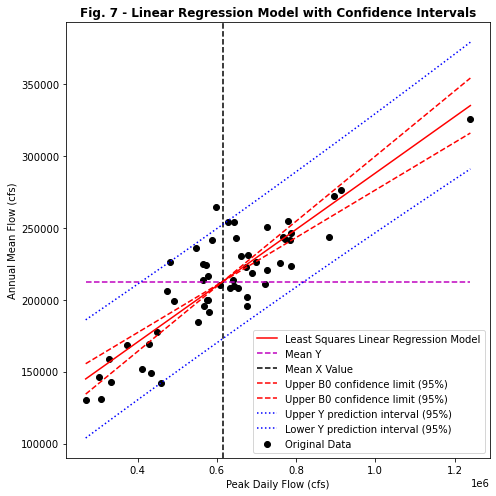

In [96]:
# Step 4: Create a figure for Linear Regression Model with Confidence Interval

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7), tight_layout=True)

# Incorporate the first Scatterplot 
ax.scatter(x, y, c='k', label='Original Data')

# Plot the regression line min/max points
ax.plot([x.min(), x.max()], [intercept + slope*x.min(), intercept + slope*x.max()] , '-r', label='Least Squares Linear Regression Model')

# Plot the mean line, min/max points
ax.plot([x.min(), x.max()], [y.mean(), y.mean()] , '--m', label='Mean Y')

# Plot the mean x line
plt.axvline(x.mean(),c='k', linestyle='--', label='Mean X Value')

# Plot the upper and lower confidence limits for the standard error of the gradient (slope)
ax.plot([x.min(), x.max()], [B0_upper + B1_upper*x.min(), B0_upper + B1_upper*x.max()] , '--r', label='Upper B0 confidence limit (95%)')
ax.plot([x.min(), x.max()], [B0_lower + B1_lower*x.min(), B0_lower + B1_lower*x.max()] , '--r', label='Upper B0 confidence limit (95%)')

# Plot confidence limits on our predicted Y values
ax.plot(p_x, p_y_upper, ':b', label='Upper Y prediction interval (95%)')
ax.plot(p_x, p_y_lower, ':b', label='Lower Y prediction interval (95%)')

# Add legend
plt.legend(loc='lower right');

# Add axes labels and title
ax.set_xlabel('Peak Daily Flow (cfs)')
ax.set_ylabel('Annual Mean Flow (cfs)')
ax.set_title('Fig. 7 - Linear Regression Model with Confidence Intervals', fontweight='bold');

# Source code: Stack overflow, Mariyam and George, Lab 4-3

In [98]:
# Step 5: Calculate 95% Confidence Interval 1858-1878

dalles_change = df_dalles[(df_dalles['Year'] >= 1858) & (df_dalles['Year'] <= 1878)]
years_change = dalles_change['Year']
x_change = dalles_change['Peak Daily (cfs)']
y_hat_change = intercept + slope*x_change
y_upper_change = B0_upper + B1_upper*x_change
y_lower_change = B0_lower + B1_lower*x_change

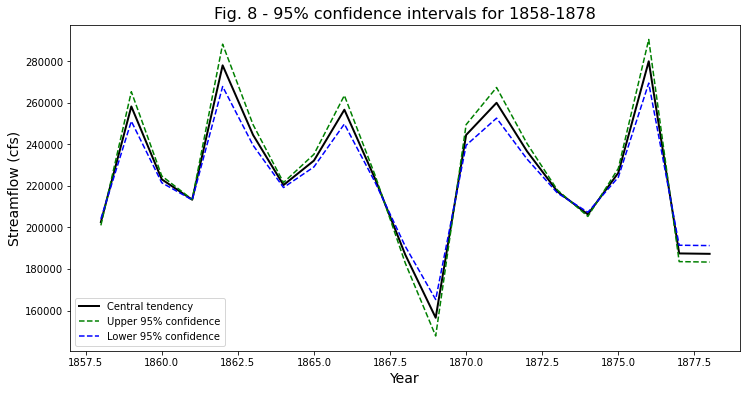

In [103]:
# Step 6: Graph
fig, ax = plt.subplots(figsize=(12,6))

# Plot the ranked data against the plotting position
ax.plot(years_change, y_hat_change, 'k-', lw=2, label="Central tendency")
ax.plot(years_change, y_upper_change, 'g--', label="Upper 95% confidence")
ax.plot(years_change, y_lower_change, 'b--', label="Lower 95% confidence")

# Label the axes and title.
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Streamflow (cfs)', fontsize=14)
ax.set_title('Fig. 8 - 95% confidence intervals for 1858-1878', fontsize=16,)
ax.legend()

**D.** Quantile Regression Model

In [116]:
# we will aslo need this 1d interpolation function
from scipy.interpolate import interp1d

In [117]:
quantiles = np.linspace(0,1,100)
x_ordered = stats.mstats.mquantiles(x, quantiles)

x_test = x.median()

x_interpolate = interp1d(x_ordered, quantiles)
x_test_quantile = x_interpolate(x_test)

y_ordered = stats.mstats.mquantiles(y, quantiles)

y_interpolate = interp1d(quantiles, y_ordered)

y_test = y_interpolate(x_test_quantile)

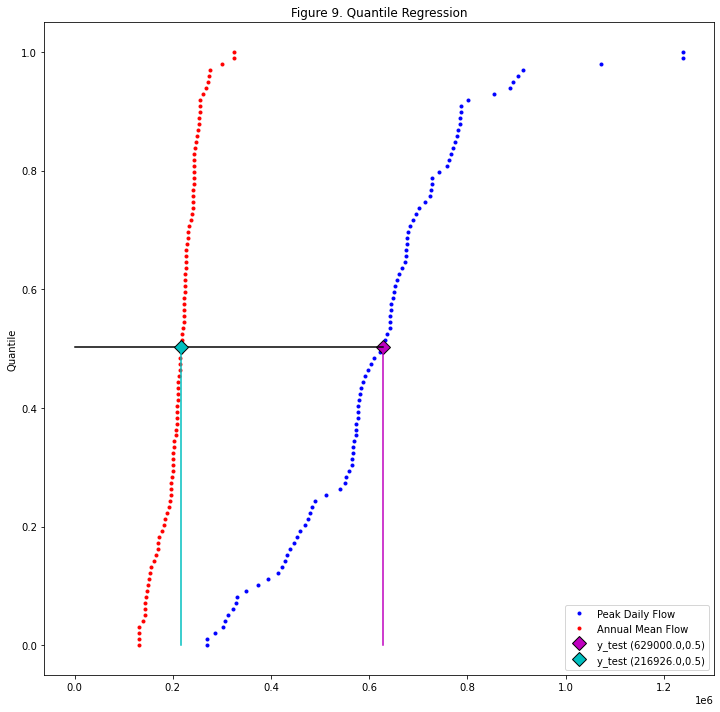

In [123]:
# Predict Peak Flow Daily values to find a matching value in Annual Mean Flow from 1858-1878
plt.figure(figsize=(12,12))

quantiles = np.linspace(0,1,100) # 100 quantile values linearly spaced between 0 and 1
plt.plot(stats.mstats.mquantiles(x, quantiles), quantiles, 'b.', label='Peak Daily Flow',)
plt.plot(stats.mstats.mquantiles(y, quantiles), quantiles, 'r.', label='Annual Mean Flow',)

# Plot the Peak daily flow test point value
plt.plot(x_test,x_test_quantile,'D', markerfacecolor='m', markeredgecolor='k',markersize=10, label='y_test ({},{})'.format(np.round(x_test), np.round(x_test_quantile,2)))

# Plot a line from the x-axis to the test point
plt.plot([x_test, x_test], [0, x_test_quantile], c='m', linestyle='-')
# Plot a line from the test point to the y-axis
plt.plot([0, x_test], [x_test_quantile, x_test_quantile], c='k', linestyle='-')

# Plot the Peak test point value
plt.plot(y_test,x_test_quantile,'D', markerfacecolor='c', markeredgecolor='k',markersize=10, label='y_test ({},{})'.format(np.round(y_test), np.round(x_test_quantile, 2)))

# Plot a line from the test point to the x-axis
plt.plot([y_test, y_test], [0, x_test_quantile], c='c', linestyle='-')
plt.ylabel('Quantile')

# Labels
plt.title('Figure 9. Quantile Regression')



# Add legend
plt.legend(loc='lower right')
plt.show()

# Quantile Regression collaboration with Marayam and George

**E**: Plot the predictions and residuals for the two different prediction models for the training period (1879-1933), and plot the model predictions for the 1858-1878 data for the two different models

In [135]:
# Create prediction from peak flow data to match a prediction for annual mean flow
y_hat_58_78_quantile_regression=y_interpolate( x_interpolate( x_change ) )
y_hat_quantile_regression=y_interpolate( x_interpolate( x ) )
residuals_quantile_regression = y - y_hat_quantile_regression

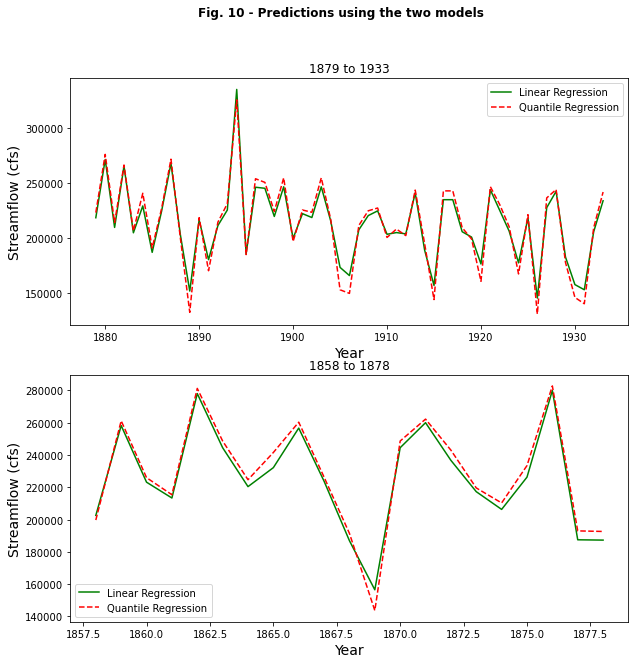

In [145]:
fig, [ax1, ax2] = plt.subplots(2,1, figsize=(10,10))

fig.suptitle('Fig. 10 - Predictions using the two models', fontweight='bold')

# Plot the ranked data against the plotting position
ax1.plot(dalles_1879_1973['Year'], y_hat, 'g-', label="Linear Regression")
ax1.plot(dalles_1879_1973['Year'], y_hat_quantile_regression, 'r--', label="Quantile Regression")

ax1.set_title('1879 to 1933')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Streamflow (cfs)', fontsize=14)
ax1.legend()

# Plot the ranked data against the plotting position
ax2.plot(years_change, y_hat_change, 'g-', label="Linear Regression")
ax2.plot(years_change, y_hat_58_78_quantile_regression, 'r--', label="Quantile Regression")
ax2.set_title('1858 to 1878')
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Streamflow (cfs)', fontsize=14)
ax2.legend();

# Graphing code in collaboration with Maryam and George

Predictions show the quantile regression provides a low prediction in the lower range in comparison to the Linear Regression. 

ValueError: x and y must be the same size

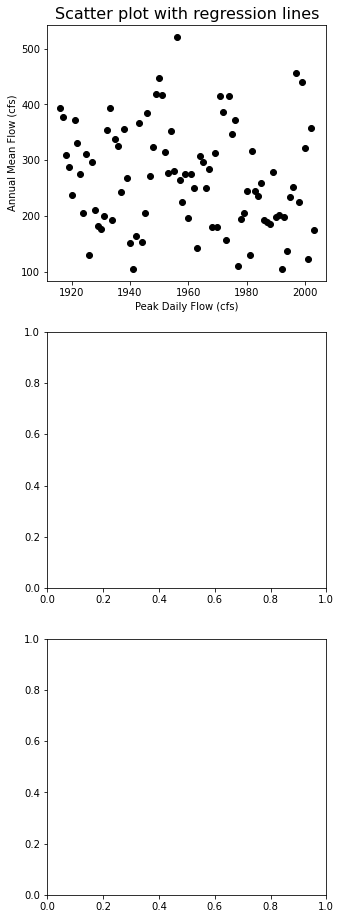

In [187]:
# Now we can plot residuals

fig, [ax1, ax2, ax3] = plt.subplots(3,1, figsize=(5,16))

# # Scatterplot
ax1.scatter(x=x, y=y, c='k', label="Original Data")
ax1.set_xlabel('Peak Daily Flow (cfs)')
ax1.set_ylabel('Annual Mean Flow (cfs)')
ax1.set_title('Scatter plot with regression lines', fontsize=16,)

# x_linspace = np.linspace(x.min(), x.max(), len(x)) 
# make a linear space of x coordinates from min and max values of SLI_max
# y_hat = slope * x_linspace + intercept 
# y coordinates using the slope and intercept from our linear regression to draw a regression line

# # Create points for the regression line
# x = np.linspace(data.SLI_max.min(), data.SLI_max.max(), 2) 
# make two x coordinates from min and max values of SLI_max
# y = slope * x + intercept # y coordinates using the slope and intercept from our linear regression to draw a regression line

# # Plot the regression line
# ax1.plot([x.min(), x.max()], [intercept + slope*x.min(), intercept + slope*x.max()], '-r', label="Least Squares Linear Regression Model");
# # Plot the mean line, we only need two points to define a line, use xmin and xmax
# ax1.plot(x_ordered, y_interpolate(x_interpolate(x_ordered)) , '--m', label='Quantile Regression')
# ax1.legend();

# Formatting code for this section was done collaborating with Maryam and Stack Overflow

# Plot the residuals
ax1.scatter(x,residuals,c='g',marker='*', label='Linear regression')
ax1.scatter(x,residuals_quantile_regression, c='r', marker='o', label='Quantile regression')
ax1.legend()
ax1.set_title('Residuals versus X');

# Plot a histogram of the residuals
ax2.hist(residuals, bins=10)
ax2.set_title('Residuals Histogram for linear regression');

# Plot a histogram of the residuals
ax3.hist(residuals_quantile_regression, bins=10)
ax3.set_title('Residuals Histogram for quantile regression');
fig.suptitle('Fig. 11 - Plot of Residuals', fontweight='bold', fontsize=16,);

*Analysis*: The three graphs above display no real proof of trends in the data we are working with. Lack of trend suggests these models are valid for the problem being addressed in this homework.

---
**Problem 3**

**A & B:** Calculate the long-term trend in April 1 SWE from 1916-2003 by fitting a linear model to the data. Estimate the uncertainty in the trend by evaluating a 95% confidence interval around the estimate of B1. That is, report the trend as: Trend = B1 ± t*sB1

In [155]:
# Show filepath and name
cascades_swe = pd.read_excel("cascades_swe.xlsx")
cascades_swe.head()

,Water Year,oct-mar precip,oct-mar tmax,oct-mar tmin,April 1 SWE
0,1916,1154.570,5.03776,-5.06206,393.719
1,1917,820.952,4.56727,-6.50644,377.514
2,1918,1095.650,7.86584,-3.23471,310.131
3,1919,1041.050,5.80953,-4.22977,287.759
4,1920,817.106,5.14475,-5.36376,237.118


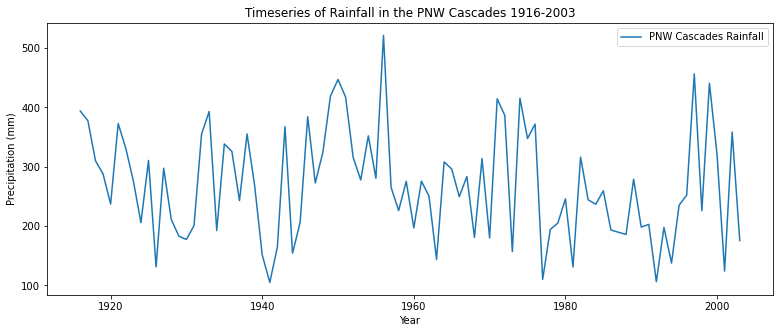

In [163]:
# Create a Timeseries Plot for Data being Asked
f, ax = plt.subplots(figsize=(13,5))

cascades_swe_1916_2003 = cascades_swe[(cascades_swe['Water Year'] >= 1916) & (cascades_swe['Water Year'] <= 2003)]

ax.plot(cascades_swe_1916_2003['Water Year'], cascades_swe_1916_2003['April 1 SWE'], linestyle='-', label='PNW Cascades Rainfall',)

# snow_pillows.plot(x='years', y='SLI_max', linestyle='-', label='Slide Canyon, SWE', ax=ax)
ax.legend()
ax.set_xlabel('Year'),
ax.set_title('Timeseries of Rainfall in the PNW Cascades 1916-2003'),
ax.set_ylabel('Precipitation (mm)');

In [164]:
cascades_swe_1916_2003 = cascades_swe[(cascades_swe['Water Year'] >= 1916) & (cascades_swe['Water Year'] <= 2003)]
x = cascades_swe_1916_2003['Water Year']
y = cascades_swe_1916_2003['April 1 SWE']

# use the linear regression function
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
n = len(x)
dof = n - 2
t = stats.t.ppf(1-alpha/2, dof)

print("Trend = {} +/- {}*{}".format(round(slope,2), round(t,2),round(stderr,2)))

#Source code: Lab 4, Slackoverflow, help from Maryam and George

Trend = -0.59 +/- 1.99*0.39


In [177]:
# Use code for mann_kendall test for problem 3
def mann_kendall(V, alpha=0.05):
    '''Mann Kendall Test (adapted from original Matlab function)
       Performs original Mann-Kendall test of the null hypothesis of trend absence in the vector V, against the alternative of trend.
       The result of the test is returned in reject_null:
       reject_null = True indicates a rejection of the null hypothesis at the alpha significance level. 
       reject_null = False indicates a failure to reject the null hypothesis at the alpha significance level.

       INPUTS:
       V = time series [vector]
       alpha =  significance level of the test [scalar] (i.e. for 95% confidence, alpha=0.05)
       OUTPUTS:
       reject_null = True/False (True: reject the null hypothesis) (False: insufficient evidence to reject the null hypothesis)
       p_value = p-value of the test
       
       From Original Matlab Help Documentation:
       The significance level of a test is a threshold of probability a agreed to before the test is conducted. 
       A typical value of alpha is 0.05. If the p-value of a test is less than alpha,        
       the test rejects the null hypothesis. If the p-value is greater than alpha, there is insufficient evidence 
       to reject the null hypothesis. 
       The p-value of a test is the probability, under the null hypothesis, of obtaining a value
       of the test statistic as extreme or more extreme than the value computed from
       the sample.
       
       References 
       Mann, H. B. (1945), Nonparametric tests against trend, Econometrica, 13, 245-259.
       Kendall, M. G. (1975), Rank Correlation Methods, Griffin, London.
       
       Original written by Simone Fatichi - simonef@dicea.unifi.it
       Copyright 2009
       Date: 2009/10/03
       modified: E.I. (1/12/2012)
       modified and converted to python: Steven Pestana - spestana@uw.edu (10/17/2019)
       '''

    V = np.reshape(V, (len(V), 1))
    alpha = alpha/2
    n = len(V)
    S = 0

    for i in range(0, n-1):
        for j in range(i+1, n):
            if V[j]>V[i]:
                S = S+1
            if V[j]<V[i]:
                S = S-1

    VarS = (n*(n-1)*(2*n+5))/18
    StdS = np.sqrt(VarS)
    # Ties are not considered

    # Kendall tau correction coefficient
    Kendall_Tau = S/(n*(n-1)/2)
    if S>=0:
        if S==0:
             Z = 0
        else:
            Z = ((S-1)/StdS)
    else:
        Z = (S+1)/StdS

    Zalpha = stats.norm.ppf(1-alpha,0,1)
    p_value = 2*(1-stats.norm.cdf(abs(Z), 0, 1)) #Two-tailed test p-value

    reject_null = abs(Z) > Zalpha # reject null hypothesis only if abs(Z) > Zalpha
    
    return reject_null, p_value

# Referenced slack overflow to change st.norm to stats.norm

In [178]:
alpha = 0.05

reject_null, p_value = mann_kendall(cascades_swe_1916_2003['April 1 SWE'].values, alpha)
print('Can we reject the null hypothesis for Slide Canyon?\n{}\n'.format(reject_null))

Can we reject the null hypothesis for Slide Canyon?
False



In [179]:
# show the p-value
p_value

0.062417800677790014

Analysis: The p-value is greater than our alpha value of 0.05. Therefore, we are unable to reject the null hypothesis with 95% confidence.

**Part C:**  Repeat this analysis (parts A and B) for just the more recent period, 1976-2003. Discuss any similarities or differences in the results of the two time periods.

In [180]:
# Repeat the steps above for a separate time period: 1976 to 2003

cascades_swe_1976_2003 = cascades_swe[(cascades_swe['Water Year'] >= 1976) & (cascades_swe['Water Year'] <= 2003)]
x2 = cascades_swe_1976_2003['Water Year']
y2 = cascades_swe_1976_2003['April 1 SWE']

# use the linear regression function
slope2, intercept2, rvalue2, pvalue2, stderr2 = stats.linregress(x2, y2)
n2 = len(x2)
dof2 = n2 - 2
t2 = stats.t.ppf(1-alpha/2, dof2)
print("Trend = {} +/- {}*{}".format(round(slope2,2), round(t2,2),round(stderr2,2)))

Trend = 2.11 +/- 2.06*2.13


In [182]:
# Set an alpha value and test the null
alpha = 0.05
reject_null2, p_value2 = mann_kendall(cascades_swe_1976_2003['April 1 SWE'].values, alpha)
print('Can we reject the null hypothesis for April 1 SWE?\n{}\n'.format(reject_null))

Can we reject the null hypothesis for April 1 SWE?
False



In [183]:
# show the p-value for this time period
p_value

0.062417800677790014

Similar to A & B, the p-value is greater than our alpha value of 0.05. Therefore, we cannot reject the null hypothesis.

In [184]:
# HW was completed with help from several people in our class, slack, stack overflow, and references to the textbook

---
**Problem 4: Project Update**

Jay and I spoke with Jessica this week about modifying our project parameters. We have decided to use max/min peak flow data on the Coulee Dam to investigate how stream